In [1]:
import pandas as pd
import csv
import json

In [2]:
unsmile_train_path = '/home/nykim/HateSpeech/00_data/korean_unsmile_dataset/unsmile_train_v1.0.tsv'
unsmile_valid_path = '/home/nykim/HateSpeech/00_data/korean_unsmile_dataset/unsmile_valid_v1.0.tsv'

kold_path = '/home/nykim/HateSpeech/00_data/KOLD/kold_v1.json'

kmhas_train_path = '/home/nykim/HateSpeech/00_data/K-MHaS/data/kmhas_train.txt'
kmhas_valid_path = '/home/nykim/HateSpeech/00_data/K-MHaS/data/kmhas_valid.txt'
kmhas_test_path = '/home/nykim/HateSpeech/00_data/K-MHaS/data/kmhas_test.txt'

hatescore_path = '/home/nykim/HateSpeech/00_data/hatescore-korean-hate-speech/HateScore.csv'

beep_train_path = '/home/nykim/HateSpeech/00_data/BEEP/labeled/train.tsv'
beep_valid_path = '/home/nykim/HateSpeech/00_data/BEEP/labeled/dev.tsv'

apeach_path = '/home/nykim/HateSpeech/00_data/APEACH/APEACH/test.csv'

In [6]:
unsmile_train = pd.read_csv(unsmile_train_path, sep='\t')
unsmile_valid = pd.read_csv(unsmile_valid_path, sep='\t')

In [8]:
len(unsmile_train)

15005

In [7]:
sen_length = {}

In [9]:
def get_csv_length(dataframe, column) :
    max_len = 0
    avg_len = 0
    for idx in range(len(dataframe)) :
        sen_len = len(dataframe[column][idx])
        avg_len += sen_len
        if max_len < sen_len : max_len = sen_len
    
    avg_len /= len(dataframe)
    return max_len, avg_len

In [10]:
u_tr_m, u_tr_a = get_csv_length(unsmile_train, '문장')
u_va_m, u_va_a = get_csv_length(unsmile_valid, '문장')

In [30]:
print(u_tr_m, u_tr_a)
print(u_va_m, u_va_a)
print(k_tr_m, k_tr_a)
print(k_va_m, k_va_a)
print(k_te_m, k_te_a)
print(h_m, h_a)
print(b_tr_m, b_tr_a)
print(b_va_m, b_va_a)
print(k_m, k_a)

155 39.755481506164614
149 39.2009633395772
300 33.06087848360915
300 32.561987237921606
300 33.049592050685995
376 31.99018725243068
135 38.710739614994935
137 38.84501061571125
203 46.00883029508521


In [11]:
kmhas_train = pd.read_csv(kmhas_train_path, sep='\t')
kmhas_valid = pd.read_csv(kmhas_valid_path, sep='\t')
kmhas_test = pd.read_csv(kmhas_test_path, sep='\t')

In [14]:
k_tr_m, k_tr_a = get_csv_length(kmhas_train, 'document')
k_va_m, k_va_a = get_csv_length(kmhas_valid, 'document')
k_te_m, k_te_a = get_csv_length(kmhas_test, 'document')

In [16]:
hatescore = pd.read_csv(hatescore_path)

In [18]:
h_m, h_a = get_csv_length(hatescore, 'comment')

In [20]:
beep_train = pd.read_csv(beep_train_path, sep='\t')
beep_valid = pd.read_csv(beep_valid_path, sep='\t')

In [22]:
b_tr_m, b_tr_a = get_csv_length(beep_train, 'comments')
b_va_m, b_va_a = get_csv_length(beep_valid, 'comments')

In [26]:
with open(kold_path, "r") as j:
    kold = json.load(j)
kold

[{'guid': 'kold-v1_00000',
  'source': 'naver_news',
  'date': '2021-07-25',
  'title': '페미니즘이 범죄가 되는 나라 [삶과 문화]',
  'comment': '남녀평등 주장할 거면 여성징병제에도 동의하라고ㅋㅋㅋ 그리고 내 말에 그냥 시비만 걸지 말고 혜택은 다 쳐받으면서 왜 차별받는다고 말하는지 말해보라고ㅋㅋㅋ',
  'OFF': True,
  'TGT': 'group',
  'GRP': 'others-feminist',
  'OFF_span': ' 쳐받으면서 왜 차별받는다고 말하는지 말해보라고ㅋㅋㅋ',
  'TGT_span': '',
  'raw_labels': [{'offensiveness': True,
    'annotator_id': 191510,
    'off_start_idx': [57],
    'off_end_idx': [84],
    'target': [['group']],
    'target_group': [['집단-성 정체성-여성']],
    'tgt_start_idx': [],
    'tgt_end_idx': []},
   {'offensiveness': True,
    'annotator_id': 192109,
    'off_start_idx': [56],
    'off_end_idx': [84],
    'target': [['not specified', 'group']],
    'target_group': [['집단-성 정체성-페미니스트', '알 수 없음']],
    'tgt_start_idx': [],
    'tgt_end_idx': []},
   {'offensiveness': True,
    'annotator_id': 193299,
    'off_start_idx': [0],
    'off_end_idx': [84],
    'target': [['group']],
    'target_group': [['집단-성 정체성-페미니스

In [27]:
len(kold)

40429

In [29]:
k_m, k_a = 0, 0
for elem in kold :
    sen_len = len(elem['comment'])
    k_a += sen_len
    if k_m < sen_len : k_m = sen_len
k_a /= len(kold)

In [3]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def get_graph(dataframe, column) :
#     lens = defaultdict(int)
    lens = np.zeros((400), dtype=np.int)
    max_len = 0
    for sen in dataframe[column] :
        lens[len(sen)] += 1
        if max_len < len(sen) : max_len = len(sen)
    
#     len_sen = [lens[key] for key in sorted(list(lens.keys()))]
    plt.bar(range(400), lens, width=1.0)
    plt.show()

/var/tmp/ipykernel_2691010/1078519272.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lens = np.zeros((400), dtype=np.int)


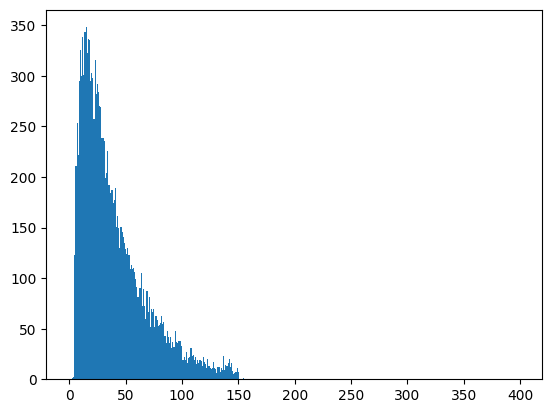

In [49]:
get_graph(unsmile_train, '문장')

/var/tmp/ipykernel_2691010/1078519272.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lens = np.zeros((400), dtype=np.int)


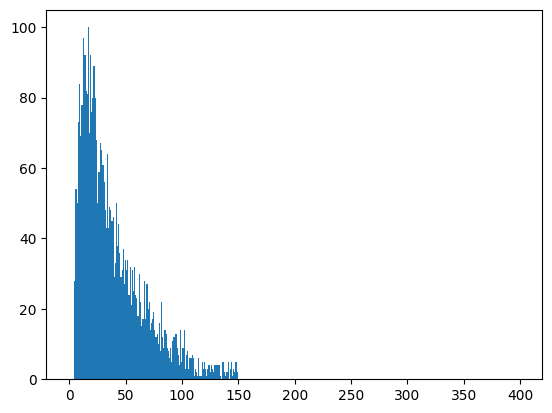

In [50]:
get_graph(unsmile_valid, '문장')

/var/tmp/ipykernel_2691010/1078519272.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lens = np.zeros((400), dtype=np.int)


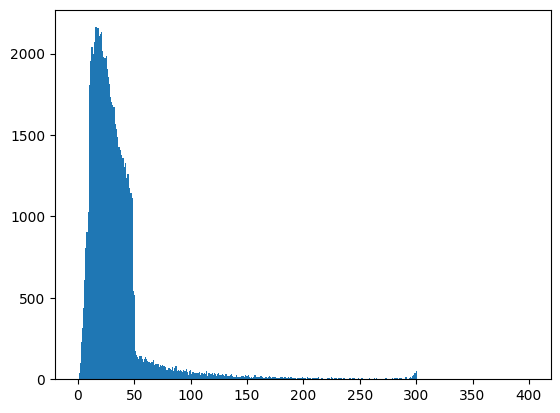

In [51]:
get_graph(kmhas_train, 'document')

/var/tmp/ipykernel_2691010/1078519272.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lens = np.zeros((400), dtype=np.int)


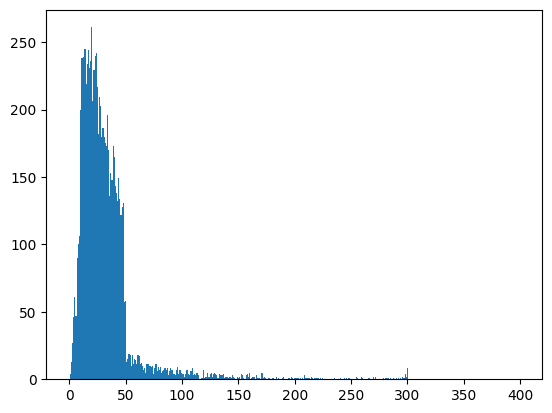

In [52]:
get_graph(kmhas_valid, 'document')

/var/tmp/ipykernel_2691010/1078519272.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lens = np.zeros((400), dtype=np.int)


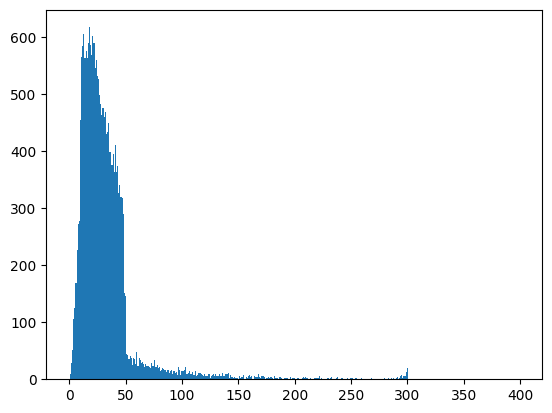

In [53]:
get_graph(kmhas_test, 'document')

/var/tmp/ipykernel_2691010/1078519272.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lens = np.zeros((400), dtype=np.int)


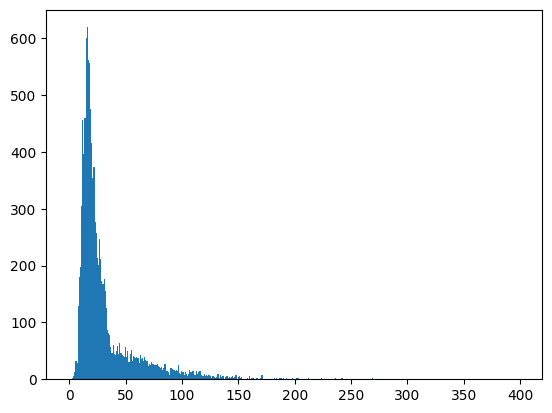

In [54]:
get_graph(hatescore, 'comment')

/var/tmp/ipykernel_2691010/1078519272.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lens = np.zeros((400), dtype=np.int)


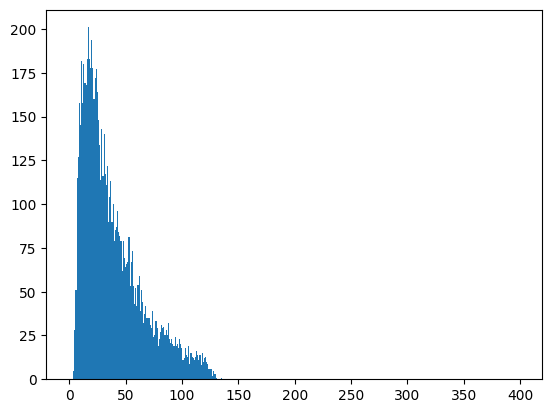

In [55]:
get_graph(beep_train, 'comments')

/var/tmp/ipykernel_2691010/1078519272.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lens = np.zeros((400), dtype=np.int)


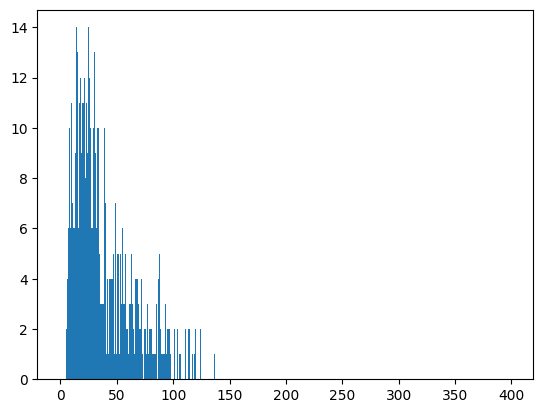

In [56]:
get_graph(beep_valid, 'comments')

/var/tmp/ipykernel_2691010/1994131735.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lens = np.zeros((400), dtype=np.int)


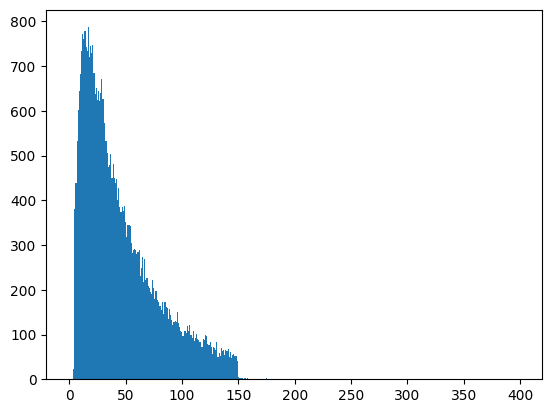

In [58]:
lens = np.zeros((400), dtype=np.int)
for elem in kold :
    sen_len = len(elem['comment'])
    lens[sen_len] += 1
plt.bar(range(400), lens, width=1.0)
plt.show()

In [12]:
print(len(kmhas_test['document']))
kmhas_test.drop_duplicates(subset=['document'], inplace=True)
print(len(kmhas_test))


21939
21901


In [13]:
list(kmhas_test['document'])

['그만큼 길예르모가 잘했다고 보면되겠지 기대되네 셰이프 오브 워터',
 '1. 8넘의 문재앙',
 '문재인 정권의 내로남불은 타의 추종을 불허하네. 자한당 욕할거리도 없음.',
 '짱개들 지나간 곳은 폐허된다 ㅋㅋ',
 '곱창은 자갈치~~~~~',
 '밥맛없게생겼냐',
 '알고 보니 외국 국적? 또는 국가유공자?',
 '중국 유학생, 중국인들 입국 금지시키고 그들을 위해 쓰여질 많은 세금을 줄여',
 '댓글 길게 쓴거보니 우리 도태한녀 화 많이 났넹 ㅋㅋ 우쭈쭈',
 '이미연 닮음',
 '관악 신림동이면 조선족.부랑자들 겁나많은곳.. 이 쪽에서 진상부리다간 칼 부림 난다..',
 'ㄴ 짱1 깨 수준에 맞긴 하겠네',
 '짜리몽땅해서 별로일꺼 같은데..얼굴이 이쁘니 뭐 그걸로 된거지~',
 '진짜 요새느끼는건데 4대보험공제가 제일무서움 이건 쨉도안되징',
 '아비가일 입담 좋네요^^',
 '그린뉴딜 해라 문재앙아 일자리좀 만들어 탈원전 탈석탄 니가 말햇잖아',
 '희대의 살인마 유영철에 90도 인사하는 꼴 ㅋㅋㅋ',
 '31살이 아이돌이래 밎친나 기자',
 '갑자기 키스하고 밤을 보내는데 어안벙벙.. 그러고는 급연애모드.. 너무 빨라;;',
 '여자가봐도너무이쁘넹안꾸며도이쁘고꾸미니더이쁘고~~~',
 '송혜교도 저꼴인데 좆소경리 30대상폐년들은 오죽하겠노ㅋㅋㅋㅋㅋㅋ',
 '솔직히 나두 현중오빠한테 항문공격 당해보구싶다ㅠㅠ',
 '국민과의 대화? 문빠들과의 대화!',
 '이주노',
 '원래 이쁜여자였지 살쪄도 이뻣어 빼니까 섹시해짐 ^^',
 '딸.....',
 '강남 쪽바리 아님????',
 '이럴줄알았다ㅋ 인간들 현우가 영주안택했다고 오지게욕할줄알았ㅇㄷ',
 '헐~나이들어 허세 주책이다 진심 2000년대 초반 허세 하두리셀카 보는줄',
 '이제 다들 애엄마들일텐데. 왜 음주운전,도박 범죄자들에 열광하고 옹호하는지 이해 할수가없음.자식들에 죄스럽지 않음?',
 '기사에 박진희 13일,내일부터 찍는다잖아요. 아직 촬영한적도 없고 그치만 14일 등장, 하루만에 찍고

/var/tmp/ipykernel_2876264/1078519272.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lens = np.zeros((400), dtype=np.int)


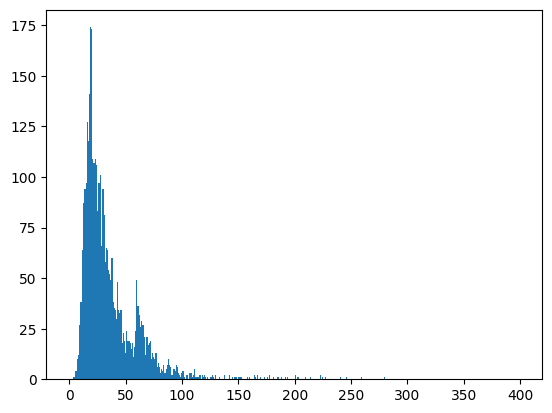

In [5]:
apeach = pd.read_csv('/home/nykim/HateSpeech/00_data/APEACH/APEACH/test.csv')
get_graph(apeach, 'text')